In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from scipy.stats import *

In [7]:
ciclo='primaria'
pathDataAprender='./data/aprender2016/'
fn=os.path.join(pathDataAprender,'aprender_2016_'+ciclo+'.csv.zip')
df=df_aprender=pd.read_csv(fn,compression='zip')

In [8]:
df_aprender.head()

,id_unidad_educativa,sexo,indice_socioeconomico_alumno,nivel_educativo_madre,nivel_educativo_padre,desepeno_lengua,desepeno_matematica,ponderador_lengua,ponderador_matematica
0,60000303,NaN,NaN,NaN,NaN,Satisfactorio,Básico,1.419299,1.36346
1,60000303,NaN,NaN,NaN,NaN,Satisfactorio,Satisfactorio,1.419299,1.36346
2,60000303,NaN,NaN,NaN,NaN,Satisfactorio,Avanzado,1.419299,1.36346
3,60000303,NaN,NaN,NaN,NaN,Satisfactorio,Satisfactorio,1.419299,1.36346
4,60000303,NaN,NaN,NaN,NaN,Avanzado,Básico,1.419299,1.36346


In [9]:
df_aprender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561950 entries, 0 to 561949
Data columns (total 9 columns):
id_unidad_educativa             561950 non-null int64
sexo                            439646 non-null object
indice_socioeconomico_alumno    452552 non-null object
nivel_educativo_madre           520853 non-null object
nivel_educativo_padre           519217 non-null object
desepeno_lengua                 497963 non-null object
desepeno_matematica             508975 non-null object
ponderador_lengua               497963 non-null float64
ponderador_matematica           508975 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 38.6+ MB


In [10]:
#show unique values in a column
df_aprender.desepeno_matematica.unique()

array(['Básico', 'Satisfactorio', 'Avanzado',
       'Por debajo del Nivel Básico', nan], dtype=object)

In [11]:
#df.desepeno_matematica.isnull().any()

print("Cantidad alumnos evaluados APRENDER 2016: {0}".format(len(df)))
print("Cantidad alu CON desempeño matemática : {0}".format(df.desepeno_matematica.count()))
print("Cantidad alu SIN desempeño matemática : {0}".format(len(df) - df.desepeno_matematica.count()))


df_con_mat=df.dropna(subset=['desepeno_matematica'])
cant_total_mat=len(df_con_mat)

cant_mat_masc=len(df_con_mat[df_con_mat.sexo=='m'])
cant_mat_fem=len(df_con_mat[df_con_mat.sexo=='f'])

df_sexo=df_con_mat.dropna(subset=['sexo'])

print("Cantidad que informaron su sexo: {}".format(cant_mat_masc+cant_mat_fem))
print("Cantidad que NO informaron su sexo: {}".format(cant_total_mat-(cant_mat_masc+cant_mat_fem)))

print("Mujeres matematica: {0}".format(cant_mat_fem))
print("Hombres matematica: {0}".format(cant_mat_masc))
print("Porcentaje mujeres con calif matemática: {0}".format(cant_mat_fem*100/(cant_mat_masc+cant_mat_fem)))
print("Porcentaje hombres con calif matemática: {0}".format(cant_mat_masc*100/(cant_mat_masc+cant_mat_fem)))

Cantidad alumnos evaluados APRENDER 2016: 561950
Cantidad alu CON desempeño matemática : 508975
Cantidad alu SIN desempeño matemática : 52975
Cantidad que informaron su sexo: 408266
Cantidad que NO informaron su sexo: 100709
Mujeres matematica: 208668
Hombres matematica: 199598
Porcentaje mujeres con calif matemática: 51.1107954127946
Porcentaje hombres con calif matemática: 48.8892045872054


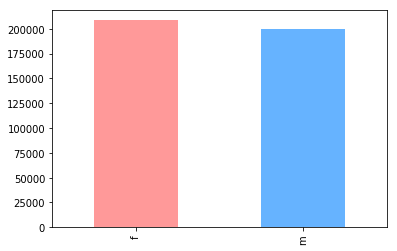

In [12]:
colors=['#ff9999','#66b3ff','#99ff99','#ffcc99']
df_con_mat["sexo"].value_counts().plot.bar(color=colors)
plt.show()

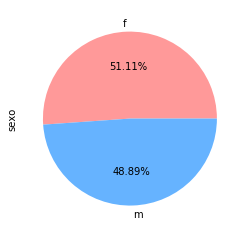

In [13]:
df_con_mat["sexo"].value_counts().plot.pie(colors=colors, autopct='%.2f%%') #labels=['masculino','femino']
plt.gca().set_aspect("equal")

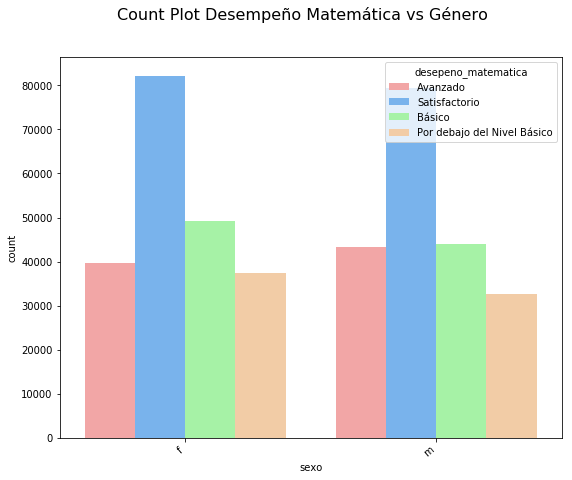

In [14]:
data=df_sexo
dg=data.groupby(['desepeno_matematica','sexo'])[['desepeno_matematica','sexo']].count()
dg.head(40)


def count_plot_together(fig_size_x, fig_size_y, x_axis, hue, df, title="", hue_order=[] ):    
    plt.figure(figsize=(fig_size_x,fig_size_y))
    ax = sns.countplot(x=x_axis, hue=hue, data=df, hue_order=hue_order, palette=colors)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

    plt.suptitle(title, size = 16);
    plt.show()
    
count_plot_together(9,7,"sexo","desepeno_matematica", data,title='Count Plot Desempeño Matemática vs Género', hue_order=['Avanzado','Satisfactorio','Básico','Por debajo del Nivel Básico'] )


<Figure size 648x504 with 0 Axes>

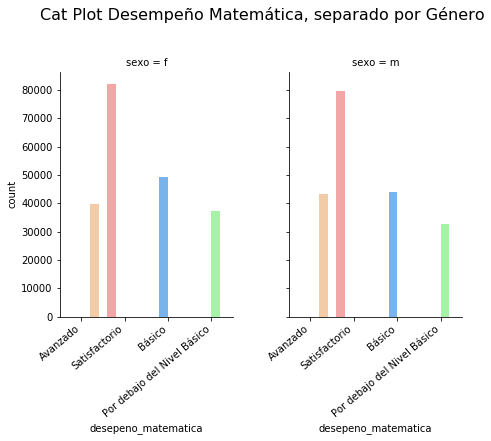

In [15]:
def fig_plot_catplot(df, column, hue, x_axis, height, aspect, title, order_rows=[]):    
    plt.figure(figsize=(9,7))
    g = sns.catplot(x=x_axis, hue=hue, col=column, data=df, kind="count", 
                    height=height, aspect=aspect, order=order_rows, palette=colors)
    g.set_xticklabels(rotation=40, ha="right")
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle(title, fontsize=16)
    plt.show()

fig_plot_catplot(data,"sexo", "desepeno_matematica", "desepeno_matematica", 5, .7, "Cat Plot Desempeño Matemática, separado por Género", order_rows=['Avanzado','Satisfactorio','Básico','Por debajo del Nivel Básico'])

Cantidad total con nivel_educativo_madre: 482077


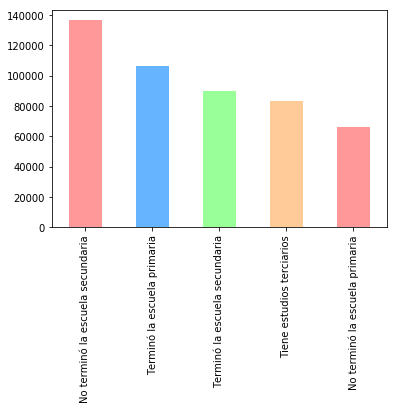

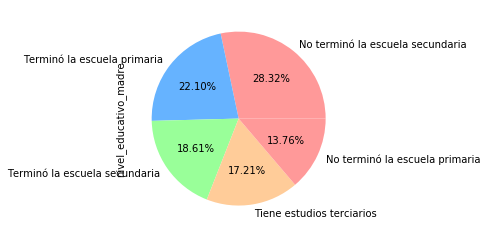

In [16]:
df_con_mat
cant_total_mat=len(df_con_mat)

dfe=df_con_mat.dropna(subset=['nivel_educativo_madre'])
df_con_mat_educativo = dfe.drop(dfe[dfe.nivel_educativo_madre == '7.0'].index)
cant_con_mat_educativo=len(df_con_mat_educativo)

print("Cantidad total con nivel_educativo_madre: {}".format(cant_con_mat_educativo))
df_con_mat_educativo["nivel_educativo_madre"].value_counts().plot.bar(color=colors)
plt.show()
df_con_mat["nivel_educativo_madre"].value_counts().plot.pie(colors=colors, autopct='%.2f%%') #labels=['masculino','femino']
plt.gca().set_aspect("equal")

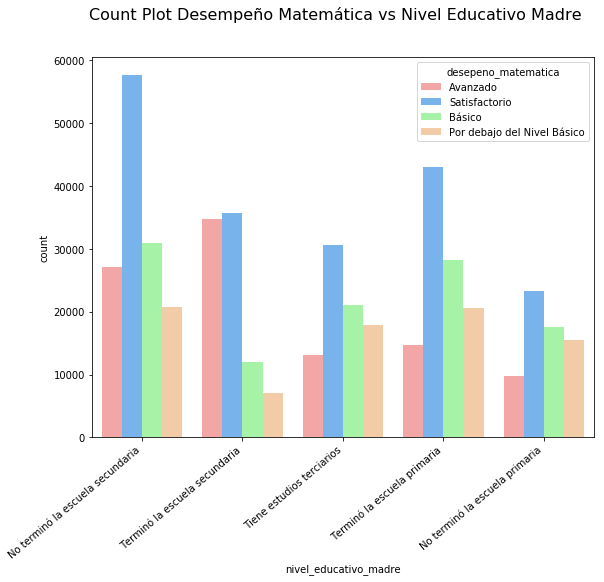

In [17]:
data=df_con_mat_educativo
#print(data.groupby(['desepeno_matematica','nivel_educativo_madre'])['nivel_educativo_madre'].count())
des_mat_ed_madre=data.groupby(['desepeno_matematica','nivel_educativo_madre'])[['desepeno_matematica','nivel_educativo_madre']].count()

count_plot_together(9, 7, "nivel_educativo_madre", "desepeno_matematica", data, title="Count Plot Desempeño Matemática vs Nivel Educativo Madre", hue_order=['Avanzado','Satisfactorio','Básico','Por debajo del Nivel Básico'])    


In [18]:
def drop_nan_of(variable): # variable es "nivel_educativo_madre", etc!
    dfe=df_con_mat.dropna(subset=[variable])
    if(variable=="nivel_educativo_padre"):
        dfe = dfe.drop(dfe[dfe.nivel_educativo_padre == '7.0'].index)
    cant_not_nan=len(dfe)

    print("Cantidad total con {0}: {1}".format(variable, cant_not_nan))
    df_con_mat_educativo[variable].value_counts().plot.bar(color=colors)
    plt.show()
    df_con_mat[variable].value_counts().plot.pie(colors=colors, autopct='%.2f%%') #labels=['masculino','femino']
    plt.gca().set_aspect("equal")
    return dfe
    

Cantidad total con nivel_educativo_padre: 480763


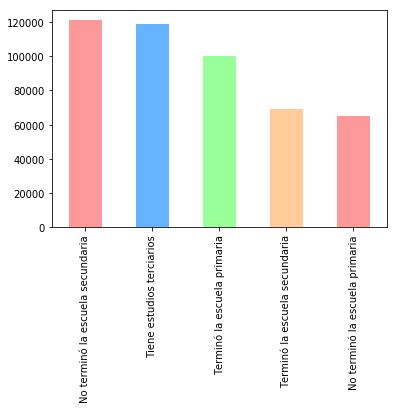

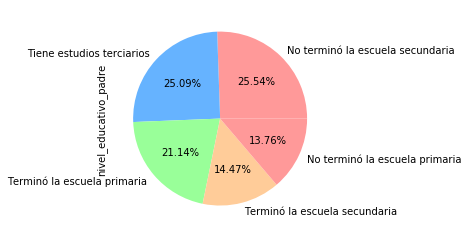

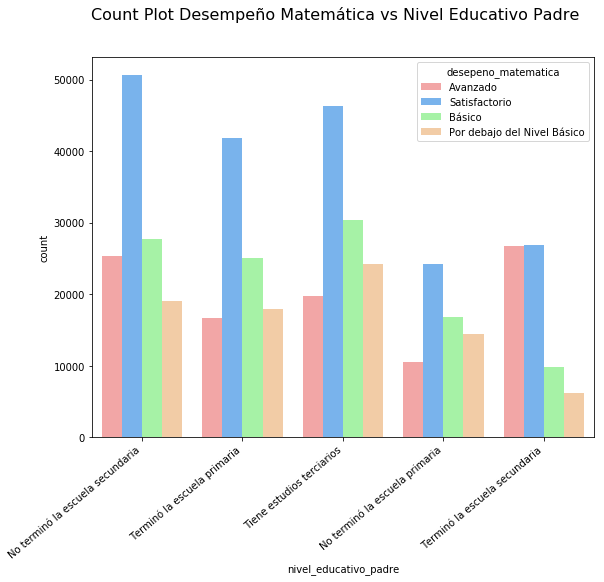

In [19]:
dp=drop_nan_of("nivel_educativo_padre")
count_plot_together(9, 7, "nivel_educativo_padre", "desepeno_matematica", dp, title="Count Plot Desempeño Matemática vs Nivel Educativo Padre", hue_order=['Avanzado','Satisfactorio','Básico','Por debajo del Nivel Básico'])    

Cantidad total con indice_socioeconomico_alumno: 421724


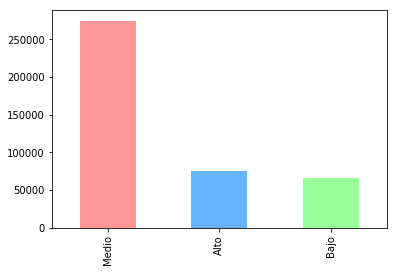

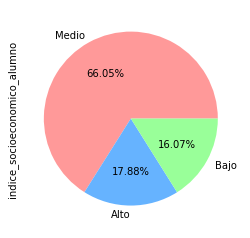

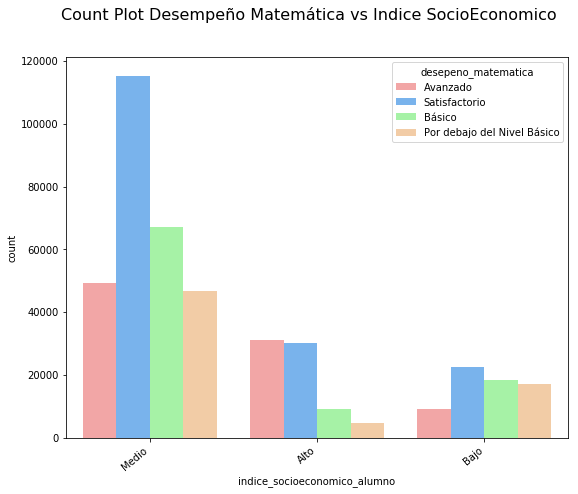

In [20]:
dp=drop_nan_of("indice_socioeconomico_alumno")
count_plot_together(9, 7, "indice_socioeconomico_alumno", "desepeno_matematica", dp, title="Count Plot Desempeño Matemática vs Indice SocioEconomico", hue_order=['Avanzado','Satisfactorio','Básico','Por debajo del Nivel Básico'])    


# REPITENCIA_PRIMARIA NO ESTA

# REPITENCIA_SECUNDARIA NO ESTA TAMPOCO POR OBVIAS RAZONES


Cantidad total con desepeno_lengua: 476386


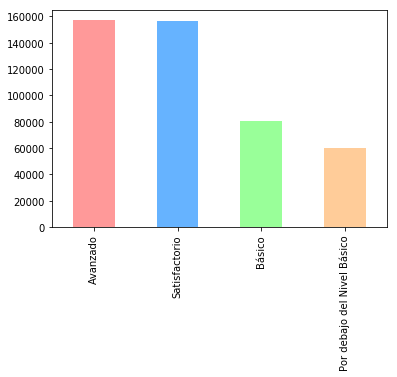

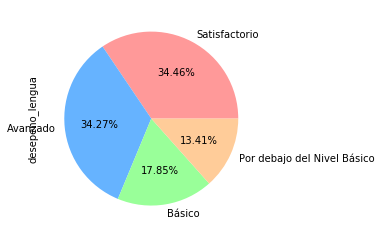

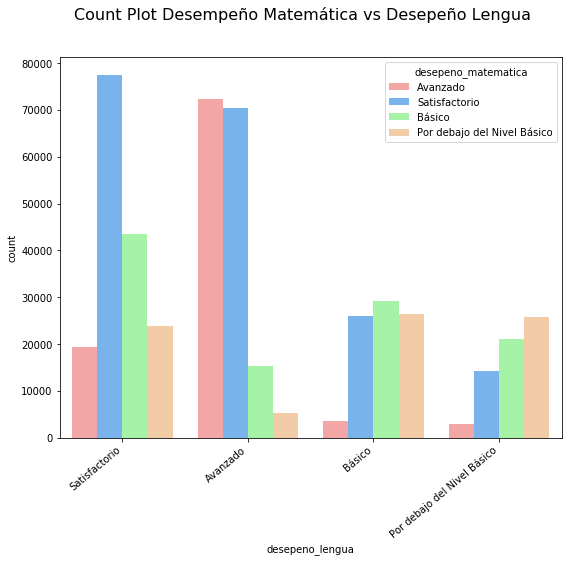

In [23]:
feature="desepeno_lengua"
dp=drop_nan_of(feature)
count_plot_together(9, 7,feature, "desepeno_matematica", dp, title="Count Plot Desempeño Matemática vs Desepeño Lengua", hue_order=['Avanzado','Satisfactorio','Básico','Por debajo del Nivel Básico'])    


In [26]:
df_not_nans=dp.dropna() 
df_not_nans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323648 entries, 13 to 561948
Data columns (total 9 columns):
id_unidad_educativa             323648 non-null int64
sexo                            323648 non-null object
indice_socioeconomico_alumno    323648 non-null object
nivel_educativo_madre           323648 non-null object
nivel_educativo_padre           323648 non-null object
desepeno_lengua                 323648 non-null object
desepeno_matematica             323648 non-null object
ponderador_lengua               323648 non-null float64
ponderador_matematica           323648 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 24.7+ MB


In [27]:
#Converting to continuos/numerical values
from sklearn.preprocessing import LabelBinarizer
import sys

char_cols = df_not_nans.dtypes.pipe(lambda x: x[x == 'object']).index
label_mapping = {}

for c in char_cols:
    df_not_nans[c],label_mapping[c] = pd.factorize(df_not_nans[c])

/Users/Hernan/miniconda3/envs/hackedu/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
df_not_nans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323648 entries, 13 to 561948
Data columns (total 9 columns):
id_unidad_educativa             323648 non-null int64
sexo                            323648 non-null int64
indice_socioeconomico_alumno    323648 non-null int64
nivel_educativo_madre           323648 non-null int64
nivel_educativo_padre           323648 non-null int64
desepeno_lengua                 323648 non-null int64
desepeno_matematica             323648 non-null int64
ponderador_lengua               323648 non-null float64
ponderador_matematica           323648 non-null float64
dtypes: float64(2), int64(7)
memory usage: 24.7 MB


In [31]:
df_not_nans.drop(columns=['ponderador_matematica','ponderador_lengua'], inplace=True)

/Users/Hernan/miniconda3/envs/hackedu/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


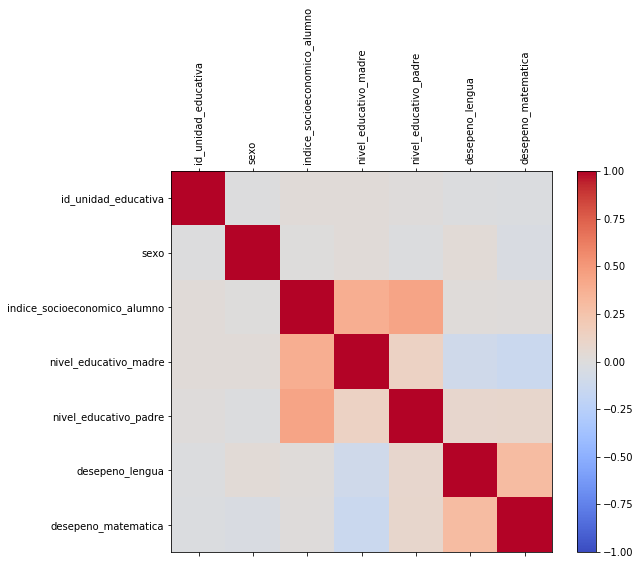

In [34]:
corr = df_not_nans.corr()
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_not_nans.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_not_nans.columns)
ax.set_yticklabels(df_not_nans.columns)
plt.show()